# Курсовая работа. Блок ML Beginner
<br>

**NB!** Код должен быть с комментариями к каждому логическому блоку кода. В противном случае работа **не** будет принята. <br><br>
Выполнение курсовой работы может потребовать использование дополнительных библиотек. Может потребоваться предварительная обработка данных.

<br><br>
**Описание работы:**
&nbsp;&nbsp;&nbsp;&nbsp;
<br><br>
&nbsp;&nbsp;&nbsp;&nbsp; Любой бизнес хочет максимизировать количество клиентов. Для достижения этой цели важно не только пытаться привлечь новых, но и удерживать уже существующих. Удержать клиента обойдется компании дешевле, чем привлечь нового. Кроме того, новый клиент может оказаться слабо заинтересованным в услугах бизнеса и с ним будет сложно работать, тогда как о старых клиентах уже есть необходимые данные по взаимодействию с сервисом. 
 <br>

&nbsp;&nbsp;&nbsp;&nbsp; Соответственно, прогнозируя отток, мы можем вовремя среагировать и попытаться удержать клиента, который хочет уйти. Опираясь на данные об услугах, которыми пользуется клиент, мы можем сделать ему специальное предложение, пытаясь изменить его решение об уходе от оператора. Благодаря этому задача удержания будет легче в реализации, чем задача привлечения новых пользователей, о которых мы еще ничего не знаем.<br>

&nbsp;&nbsp;&nbsp;&nbsp; Вам предоставлен набор данных от телекоммуникационной компании. В данных содержится информация о почти шести тысячах пользователей, их демографических характеристиках, услугах, которыми они пользуются, длительности пользования услугами оператора, методе оплаты, размере оплаты. 
<br>

&nbsp;&nbsp;&nbsp;&nbsp; Cтоит задача проанализировать данные и спрогнозировать отток пользователей (выявить людей, которые продлят контракт и которые не продлят). Работа должна включать в себя следующие обязательные пункты: 
1. Описание данных *(с расчетом базовых статистик)*, 
2. Исследование зависимостей и формулирование гипотез, 
3. Построение моделей для прогнозирования оттока *(с обоснованием выбора той или иной модели)* на основе проверенных гипотез и выявленных взаимосвязей, 
4. Сравнение качества полученных моделей. 

Во втором разделе обязательно должно присутствовать обоснование гипотез, подробное описание выявленных взаимосвязей, а также их визуализация. 
<br>В четвертом дополнительно должны быть сформулированы общие выводы работы.

<br><br>

_________

[Codebook](#Codebook) <br>
[1. Описание данных](#1.-Описание-данных)<br>
[2. Исследование зависимостей и формулирование гипотез](#2.-Исследование-зависимостей-и-формулирование-гипотез)<br>
[3. Построение моделей для прогнозирования оттока](#3.-Построение-моделей-для-прогнозирования-оттока)<br>
[4. Сравнение качества моделей](#4.-Сравнение-качества-моделей) <br>


## Codebook
<br>

[Ссылка для скачивания данных](https://drive.google.com/open?id=1dPCG76ST6NohYKtVMGv6HpFL-jD5p1eJ) 
<br><br>

`telecom_users.csv` содержит следующие значения:<br><br>

&nbsp;&nbsp;&nbsp;&nbsp; `customerID` – id клиента<br>
&nbsp;&nbsp;&nbsp;&nbsp; `gender` – пол клиента (male/female)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `SeniorCitizen` – яляется ли клиент пенсионером (1, 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Partner` – состоит ли клиент в браке (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Dependents` – есть ли у клиента иждивенцы (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `tenure` – сколько месяцев человек являлся клиентом компании<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PhoneService` – подключена ли услуга телефонной связи (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MultipleLines` – подключены ли несколько телефонных линий (Yes, No, No phone service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `InternetService` – интернет-провайдер клиента (DSL, Fiber optic, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineSecurity` – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineBackup` – подключена ли услуга online backup (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `DeviceProtection` – есть ли у клиента страховка оборудования (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TechSupport` – подключена ли услуга технической поддержки (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingTV` – подключена ли услуга стримингового телевидения (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingMovies` – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Contract` – тип контракта клиента (Month-to-month, One year, Two year)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaperlessBilling` – пользуется ли клиент безбумажным биллингом (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaymentMethod` – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MonthlyCharges` – месячный размер оплаты на настоящий момент<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TotalCharges` – общая сумма, которую клиент заплатил за услуги за все время<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Churn` – произошел ли отток (Yes or No)<br>

# 1. Описание данных

In [110]:
### YOUR CODE HERE ###
import numpy as np
import pandas as pd
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization

df = pd.read_csv("telecom_users.csv", index_col = 0)
df[:5]



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


Выведем небольшую статистику по датафрейму:

In [111]:
print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum().values.sum())
print ("\nUnique values :  \n",df.nunique())

Rows     :  5986
Columns  :  21

Features : 
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Missing values :   0

Unique values :  
 customerID          5986
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1526
TotalCharges        5611
Churn                  2
dtype: int64


# 2. Исследование зависимостей и формулирование гипотез

In [112]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.dropna()
churn = df[df["Churn"] == "Yes"]
not_churn = df[df["Churn"] == "No"]
target_col = ["Churn"]
cat_cols = df.nunique()[df.nunique() < 6].keys().tolist()
cat_cols = [x for x in cat_cols if x not in target_col] 


Id_col     = ['customerID']
target_col = ["Churn"]
num_cols   = [x for x in df.columns if x not in cat_cols + target_col + Id_col]

Посмотрим как распределены пользователи по критерию "Churn":

In [113]:
#labels
lab = df["Churn"].value_counts().keys().tolist()
#values
val = df["Churn"].value_counts().values.tolist()

trace = go.Pie(labels = lab ,
               values = val ,
               marker = dict(colors =  [ 'royalblue' ,'red'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "Customer attrition in data",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )

data = [trace]
fig = go.Figure(data = data,layout = layout)
py.iplot(fig)

Посмотрим как распределены категориальные характеристики:

In [114]:
def plot_pie(column) :
    
    trace1 = go.Pie(values  = churn[column].value_counts().values.tolist(),
                    labels  = churn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [0,.48]),
                    name    = "Churn Customers",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    hole    = .6
                   )
    



    trace2 = go.Pie(values  = not_churn[column].value_counts().values.tolist(),
                    labels  = not_churn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    domain  = dict(x = [.52,1]),
                    hole    = .6,
                    name    = "Non churn customers", 
                    sort = False
                   )


    layout = go.Layout(dict(title = column + " distribution in customer attrition ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            annotations = [dict(text = "churn customers",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .15, y = .5),
                                           dict(text = "Non churn customers",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .88,y = .5
                                               )
                                          ]
                           )
                      )
    data = [trace1,trace2]
    fig  = go.Figure(data = data,layout = layout)
    py.iplot(fig)


#function  for histogram for customer attrition types
def histogram(column) :
    trace1 = go.Histogram(x  = churn[column],
                          histnorm= "percent",
                          name = "Churn Customers",
                          marker = dict(line = dict(width = .5,
                                                    color = "black"
                                                    )
                                        ),
                         opacity = .9 
                         ) 
    
    trace2 = go.Histogram(x  = not_churn[column],
                          histnorm = "percent",
                          name = "Non churn customers",
                          marker = dict(line = dict(width = .5,
                                              color = "black"
                                             )
                                 ),
                          opacity = .9
                         )
    
    data = [trace1,trace2]
    layout = go.Layout(dict(title =column + " distribution in customer attrition ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = column,
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = "percent",
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                           )
                      )
    fig  = go.Figure(data=data,layout=layout)
    
    py.iplot(fig)
    


#for all categorical columns plot pie
for i in cat_cols :
    plot_pie(i)


Посмотрим как распределены числовые характеристики:

In [115]:
for i in num_cols :
    histogram(i)


Начнем формировать гипотезы, ниже представлена функция для отборы значимых признаков, влияющих на целевую переменную. Отбор происходит следующим образом: поочередно сравнивается доли клиентов в разных секторах, в категории "churn" и "not churn", путем деления большего на меньшее, полученные коэффициенты перемножаются, получается итоговый коэффициент изменения распределения, если он больше определенного значения (в моем случае 1.5), то данный признак отбирается. Так же отбираются все числовые категории, из-за их неравномерного распределения.

In [116]:
def influence(columns):
    inf_cols = list()
    for column in columns:

        c_l = churn[column].value_counts().values.tolist() #распредение в "churn"
        nc_l = not_churn[column].value_counts().values.tolist() #распредение в "not churn"
        c_sum = churn[column].value_counts().values.sum() #сумма значений в "churn"
        nc_sum = not_churn[column].value_counts().values.sum() #сумма значений в "not churn"

        distr_k = 1
        
        labels_nc  = not_churn[column].value_counts().keys().tolist()
        labels_c  = churn[column].value_counts().keys().tolist()

        dic_c = dict(zip(labels_c, c_l))
        dic_nc = dict(zip(labels_nc, nc_l))
        new_dic_nc = dict()
        
        list_keys = list(dic_c.keys())
        
        for i in list_keys: #Сортируем словарь (если так можно выразиться)
            new_dic_nc[i] = dic_nc[i]

        nc_l = list(new_dic_nc.values())


        for i, j in zip(c_l, nc_l):

            diff = (j/nc_sum)/(i/c_sum) #делим долю в "not churn" на "churn"
            if diff < 1:
                diff = 1/diff

            distr_k *= diff
            
        if distr_k > 1.5:

            print(column, distr_k)
            inf_cols.append(column)
    return inf_cols
    
inf_columns = influence(cat_cols)
inf_columns = inf_columns + num_cols

SeniorCitizen 2.300700242391597
Partner 1.9681408087642982
Dependents 2.413129196646009
InternetService 12.919314432548076
OnlineSecurity 18.38833498993297
OnlineBackup 10.444859484721382
DeviceProtection 9.693440492434839
TechSupport 16.795176085620508
StreamingTV 7.111753941763091
StreamingMovies 7.125191052676461
Contract 69.79916122432465
PaperlessBilling 2.537812715412162
PaymentMethod 12.022235347436645


Приведем датафрейм к удобному виду, заменим все категориальные значения на числа:

In [117]:
di1 ={'Male': 0, 'Female': 1}
di2 ={'Yes': 1, 'No': 0, 'No internet service': 2, 'No phone service': 2}
di3 ={'No': 0, 'DSL': 1, 'Fiber optic': 2}
di4 ={'Month-to-month': 0, 'One year': 1, 'Two year': 2}
di5 ={'Electronic check': 0, 'Mailed check': 1, 'Bank transfer (automatic)': 2, 'Credit card (automatic)': 3}


cols = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
         'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
        'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']
for col in cols:
    df[col].replace(di2, inplace=True)

df['gender'].replace(di1, inplace=True)
df['InternetService'].replace(di3, inplace=True)
df['Contract'].replace(di4, inplace=True)
df['PaymentMethod'].replace(di5, inplace=True)

df_inf = df[inf_columns] #отдельно создадим датафрейм, где отобраны наиболее значимые признаки

df[:5]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1869,7010-BRBUU,0,0,1,1,72,1,1,0,2,...,2,2,2,2,2,0,3,24.10,1734.65,0
4528,9688-YGXVR,1,0,0,0,44,1,0,2,0,...,1,0,1,0,0,1,3,88.15,3973.20,0
6344,9286-DOJGF,1,1,1,0,38,1,1,2,0,...,0,0,0,0,0,1,2,74.95,2869.85,1
6739,6994-KERXL,0,0,0,0,4,1,0,1,0,...,0,0,0,1,0,1,0,55.90,238.50,0
432,2181-UAESM,0,0,0,0,2,1,0,1,1,...,1,0,0,0,0,0,0,53.45,119.50,0


Потроим матрицу рассеяния: 

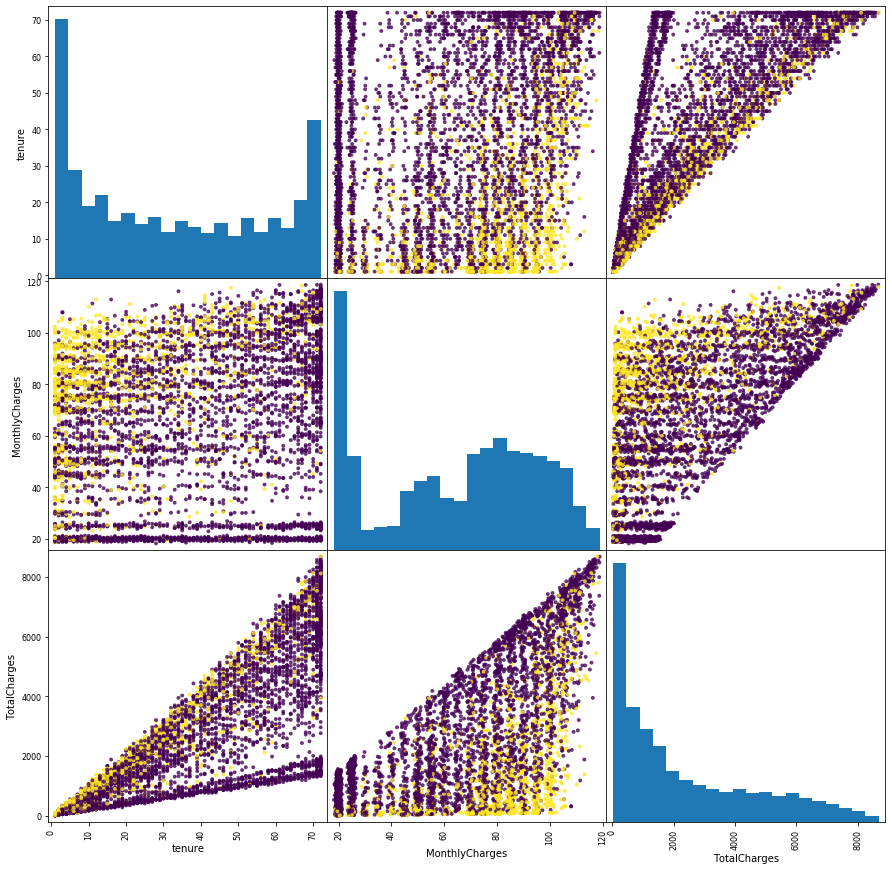

In [118]:
scat_mtrx = pd.plotting.scatter_matrix(df[num_cols], c=df['Churn'], figsize=(15, 15), marker='o',
                                       hist_kwds={'bins': 20}, s=15, alpha=.8)

## Гипотезы:
1. Влияние на целевую переменную оказывают все признаки.
2. Влияние на целевую переменную оказывают те признаки, которые неравномерно распределены, следовательно от остальных можно избавиться и если качество модели и ухудшится, то незначительно.

# 3. Построение моделей для прогнозирования оттока

Разделим данные для тренировочную и тестовую части.

In [119]:
from sklearn.model_selection import train_test_split 
dataset = df.to_numpy() #датасет для проверки 1й гипотезы (все признаки оставлены)
dataset_inf = df_inf.to_numpy() #датасет для проверки 2й гипотезы

x_train, x_test, y_train, y_test = train_test_split(dataset[:, 1:20].astype('float'), 
                                                    dataset[:, 20].astype('int'),
                                                    random_state=17,
                                                    test_size=0.25)

x_train_inf, x_test_inf, y_train_inf, y_test_inf = train_test_split(dataset_inf.astype('float'), 
                                                    dataset[:, 20].astype('int'),
                                                    random_state=17,
                                                    test_size=0.25)



Для прогнозирования оттока были выбраны 4 модели: KNeighborsClassifier, GaussianNB, DecisionTreeClassifier и LogisticRegression. 

In [120]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, recall_score

from sklearn.model_selection import (GridSearchCV,
                                     StratifiedKFold)

def proverka(x_train, x_test, y_train, y_test):
    
    lr_params = {'C': np.arange(0.1, 1.5, 0.1)}

    knn_params = {'n_neighbors': range(2, 20, 1)}

    dtc_params = {'max_depth': range(1, 10), 
                   'max_features': range(1, 10)}

    skf = StratifiedKFold(n_splits=5, random_state=17, shuffle=True)

    lr = LogisticRegression(random_state=17, max_iter = 500)
    lr_greed = GridSearchCV(lr, lr_params, scoring = 'recall', cv=skf).fit(x_train, y_train)
    lr_pred = lr_greed.predict(x_test)

    knn = KNeighborsClassifier()
    knn_greed = GridSearchCV(knn, knn_params, scoring = 'recall', cv=skf).fit(x_train, y_train)
    knn_pred = knn_greed.predict(x_test)

    dtc = DecisionTreeClassifier(random_state=17)
    dtc_greed = GridSearchCV(dtc, dtc_params, scoring = 'recall', cv=skf).fit(x_train, y_train)
    dtc_pred = dtc_greed.predict(x_test)

    nb = GaussianNB()
    nb_model = nb.fit(x_train, y_train)
    nb_pred = nb.predict(x_test)

    models = [knn_pred, nb_pred, dtc_pred, lr_pred]
    names = ['KNeighbors', 'GaussianNB', 'DecisionTree', 'LogisticRegression']
    for model, name in zip(models, names):
        print('Метрики accuracy и recall в модели:', name, accuracy_score(y_test, model), recall_score(y_test, model))

    

Для оценки качества моделей будем использовать две метрики: accuracy и recall. Если с первой метрикой все понятно, то вторая метрика предпочтительна, так как нам важно выявлять клиентов, готовых прекратить сотрудничество, потому что сохранение клиента дешевле чем привлечение нового.

### Проверка гипотезы №1

In [121]:
proverka(x_train, x_test, y_train, y_test)

Метрики accuracy и recall в модели: KNeighbors 0.7436412315930389 0.4534005037783375
Метрики accuracy и recall в модели: GaussianNB 0.6840696117804551 0.801007556675063
Метрики accuracy и recall в модели: DecisionTree 0.7115127175368139 0.6826196473551638
Метрики accuracy и recall в модели: LogisticRegression 0.7951807228915663 0.5591939546599496


### Проверка гипотезы №2

In [122]:
proverka(x_train_inf, x_test_inf, y_train_inf, y_test_inf)

Метрики accuracy и recall в модели: KNeighbors 0.7429718875502008 0.4534005037783375
Метрики accuracy и recall в модели: GaussianNB 0.6847389558232931 0.801007556675063
Метрики accuracy и recall в модели: DecisionTree 0.7222222222222222 0.6952141057934509
Метрики accuracy и recall в модели: LogisticRegression 0.7911646586345381 0.5491183879093199


Как можно увидеть, качество моделей отличается незначительно (а в первых двух моделях не отличается вообще), в целом более верной оказалась 2я гипотеза.

# 4. Сравнение качества моделей 

По приведенным выше даннам, было видно, что лучший показатель recall у модели GaussianNB, а accuracy у модели LogisticRegression. Так что выберем именно их и построим итоговые модели на основе датасета, где присутствуют все признаки (для удобства проверки).

In [123]:
x_train = dataset[:, 1:20].astype('float')
y_train = dataset[:, 20].astype('int')

lr = LogisticRegression(random_state=17, max_iter = 500, C = 1.0)
lr_model = lr.fit(x_train, y_train)


nb = GaussianNB()
nb_model = nb.fit(x_train, y_train)


### Общие выводы:
1. Не все признаки в этом датасете одинаково полезны. Если устранить малополезные признаки, то качество полученных моделей особо не меняется.
2. Все рассмотренные модели дали неплохие результаты, особо стоит отметить модели LogisticRegression и GaussianNB. Если первая в целом отличается большей точностью, то вторая позволяет минимизировать количество людей, которые хотят прервать сотрудничество с компанией, в нашем случае это все же важнее, чем просто точность.